In [41]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
import librosa
import pandas as pd
import numpy as np
from pathlib import Path
import json
import matplotlib.pyplot as plt


In [43]:
DATASET_PATH = Path('../../../../datasets/prints/')
assert DATASET_PATH.exists()


# Exploration

In [44]:
print_path = DATASET_PATH / 'hinges_13' / 'audio.mp4'
audio, rate = librosa.load(print_path.as_posix())

/tmp/ipykernel_23906/1643209694.py:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, rate = librosa.load(print_path.as_posix())
/home/y2g/projects/personal/printer-anomaly-detection/.venv/lib/python3.10/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


In [45]:
audio.shape[0] / 22050

6812.245351473923

In [46]:
audio.shape

(150210010,)

In [47]:
from IPython.display import Audio, display

display(Audio(audio[:22050*5], rate=22050))

## Short-time Fourier transform 

https://www.youtube.com/watch?v=-Yxj3yfvY-4

In [48]:
size = 512 + 1

assert np.log2(size - 1) % 1 == 0

In [49]:
audio.shape

(150210010,)

In [50]:
size = 512 + 1
assert np.log2(size - 1) % 1 == 0

(513, 513)


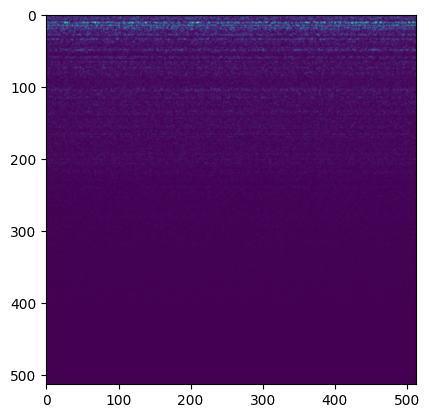

In [51]:
#n_fft = (size - 1) * 2
#hop_length = n_fft // 4
#win_length = n_fft
#extra_frames = 2 + 2 # 2 at beginning and tail, depends unknowingly on the other params

# data_limit = size * hop_length

n_fft = (size - 1) * 2
hop_length = n_fft // 4
S = np.abs(librosa.stft(audio[:size * hop_length - 1], n_fft=n_fft))
print(S.shape)
plt.imshow(S);

TODO: Hörbaren Bereich markieren

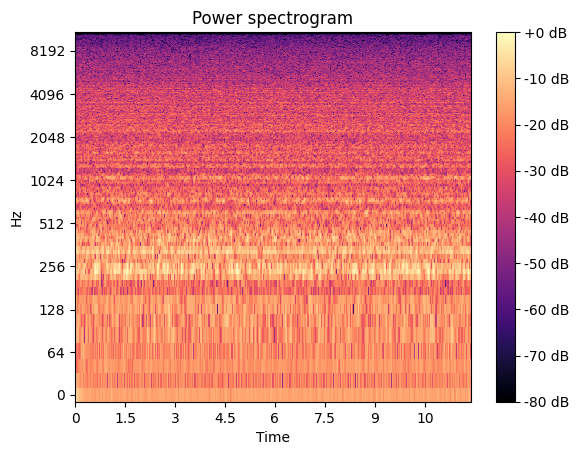

In [52]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), y_axis='log', x_axis='time', ax=ax)
ax.set_title('Power spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

## Vor und nach dem Exhaust? Upgrade des Extruders?

In [53]:
print_path = DATASET_PATH / 'arducam_case_mount' / 'audio.mp4'
audio, rate = librosa.load(print_path.as_posix())
# 2 minuten
audio = audio[22050*120:]

/tmp/ipykernel_23906/2280491680.py:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, rate = librosa.load(print_path.as_posix())
/home/y2g/projects/personal/printer-anomaly-detection/.venv/lib/python3.10/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


(1025, 1025)


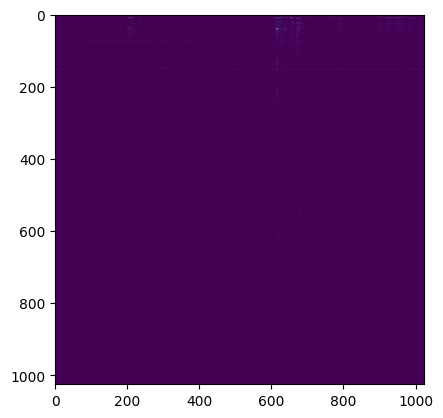

In [54]:
lim = int(22050*23.8)

display(Audio(audio[:lim], rate=22050))

S = np.abs(librosa.stft(audio[:lim]))
P = np.angle(librosa.stft(audio[:lim]))
# why not P? because it is a phase, and it is not important for us. It is defined as the angle of the complex number (sagt Copilot ... ob das stimmt?)
print(S.shape)
plt.imshow(S);

In [55]:
print_path = DATASET_PATH / 'hinges_10' / 'audio.mp4'
audio, rate = librosa.load(print_path.as_posix())
# 2 minuten
audio = audio[22050*120:]

/tmp/ipykernel_23906/676079574.py:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, rate = librosa.load(print_path.as_posix())
/home/y2g/projects/personal/printer-anomaly-detection/.venv/lib/python3.10/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


(1025, 1025)


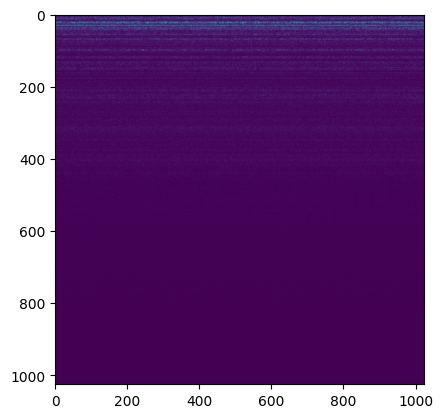

In [56]:
lim = int(22050*23.8)

display(Audio(audio[:lim], rate=22050))

S = np.abs(librosa.stft(audio[:lim]))
P = np.angle(librosa.stft(audio[:lim]))
# why not P? because it is a phase, and it is not important for us. It is defined as the angle of the complex number (sagt Copilot ... ob das stimmt?)
print(S.shape)
plt.imshow(S);

In [57]:
print_path = DATASET_PATH / 'hinges_13' / 'audio.mp4'
audio, rate = librosa.load(print_path.as_posix())
# 2 minuten
audio = audio[22050*120:]

/tmp/ipykernel_23906/3649273169.py:2: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, rate = librosa.load(print_path.as_posix())
/home/y2g/projects/personal/printer-anomaly-detection/.venv/lib/python3.10/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


(1025, 1025)


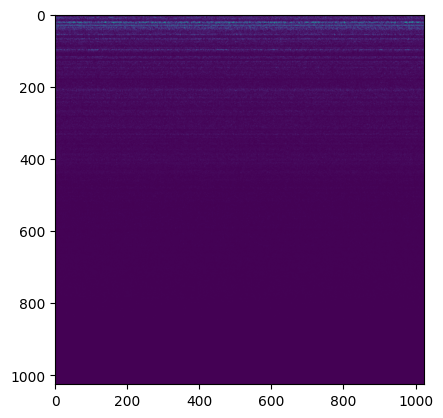

In [58]:
lim = int(22050*23.8)

display(Audio(audio[:lim], rate=22050))

S = np.abs(librosa.stft(audio[:lim]))
P = np.angle(librosa.stft(audio[:lim]))
# why not P? because it is a phase, and it is not important for us. It is defined as the angle of the complex number (sagt Copilot ... ob das stimmt?)
print(S.shape)
plt.imshow(S);

In [59]:
np.mean(S), np.std(S)


(0.78117377, 1.4950415)

# Ziel:
* 3 Etappen: 
1. trainieren, dann Exhaust erkennen
2. trainieren dann Directdrive erkennen 
3. trainieren dann Anomalien erkennen

-> 3 separierte Datensätze

# Build datasets

In [60]:
from pathlib import Path
from printer_anomaly_detection.util import dict_schema_repr

datasets_path = Path('../../../../datasets/prints/')

In [61]:
from datetime import datetime
from printer_anomaly_detection.dataset.domain import Datetime

from printer_anomaly_detection.preprocessing.data import Outcome

def load_info(path: Path):
    path = Path(path)
    with open(path / 'info.json') as f:
        info = json.load(f)
    return info

def get_recording_time(path: Path) -> Datetime:
    path = Path(path)
    info = load_info(path)
    return Datetime(datetime.fromisoformat(info['time']))

def get_outcome(path: Path) -> Outcome:
    path = Path(path)
    info = load_info(path)
    return Outcome(info['outcome'])

In [124]:
from functools import cache
from typing import Iterator, Set

from printer_anomaly_detection.dataset.domain import Datetime

import tensorflow as tf


@tf.function
def split_with_reminder(x, size):
  # Reshape the tensor without the reminder.
  length = tf.shape(x)[0]
  l = length - length % size
  dense = tf.reshape(x[:l,:], [l // size, size, size])
  dense = tf.RaggedTensor.from_tensor(dense)
  return dense


def _windowed_sft(audio: tf.Tensor, size: int, step_size: int) -> Iterator[tf.Tensor]:
    n_fft = (size - 1) * 2

    sft = tf.abs(tf.signal.stft(audio, frame_length=size, frame_step=step_size, fft_length=n_fft))

    return split_with_reminder(sft, size)

def get_audio_dataset_files(after: Datetime, before: Datetime, outcomes: Set[Outcome]) -> Iterator[Path]:
    for print_path in datasets_path.iterdir():
        if print_path.is_file():
            continue
        
        time = get_recording_time(print_path)
        if time < after or time > before:
            continue

        outcome = get_outcome(print_path)
        if outcome not in outcomes:
            continue

        yield print_path / 'audio.mp4'

@cache
def load_audio_file(path: Path) -> np.array:
    audio, _ = librosa.load(path.as_posix())
    return audio

def load_audio_dataset(after: Datetime, before: Datetime, window_size: int, step_size: int, outcomes: Set[Outcome] = {Outcome.SUCCESS}) -> Iterator[tf.Tensor]:
    for audio_path in get_audio_dataset_files(after, before, outcomes):
        audio = load_audio_file(audio_path)
        # batches from audio
        tf_audio = tf.convert_to_tensor(audio, dtype=tf.float32)
        for window in _windowed_sft(tf_audio, window_size, step_size):
            yield window

with tf.device('CPU:0'):
    audio = load_audio_file(datasets_path / 'hinges_13' / 'audio.mp4')
    audio = tf.convert_to_tensor(audio, dtype=tf.float32)
##duration = get_audio_duration(datasets_path / 'hinges_13' / 'audio.mp4')

for w in _windowed_sft(audio, size=256, step_size=16384):
    print(w.shape)
    break
    

/tmp/ipykernel_23906/2522270404.py:43: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, _ = librosa.load(path.as_posix())
/home/y2g/projects/personal/printer-anomaly-detection/.venv/lib/python3.10/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


(256, 256)


In [126]:
def load_audio_dataset(after: Datetime, before: Datetime, window_size: int, step_size: int, outcomes: Set[Outcome] = {Outcome.SUCCESS}) -> Iterator[tf.Tensor]:
    def generator():
        for audio_path in get_audio_dataset_files(after, before, outcomes):
            with tf.device('CPU:0'):
                audio = load_audio_file(audio_path)
                audio = tf.convert_to_tensor(audio, dtype=tf.float32)

            for w in _windowed_sft(audio, window_size, step_size):
                yield w
    return tf.data.Dataset.from_generator(generator, output_signature=(tf.TensorSpec(shape=(size, size), dtype=tf.float32)))
dataset = load_audio_dataset(Datetime.min, Datetime.max, 256, 16384)

2023-06-19 21:37:52.877070: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


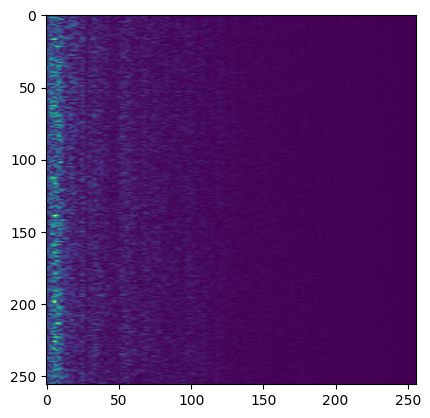

In [132]:
plt.imshow(list(dataset.take(1))[0])

In [103]:
size = 256
n_fft = (size - 1) * 2
hop_length = n_fft // 4

sft = tf.abs(tf.signal.stft(audio, frame_length=size, frame_step=8192, fft_length=n_fft))

In [120]:
data = split_with_reminder(sft, 256)

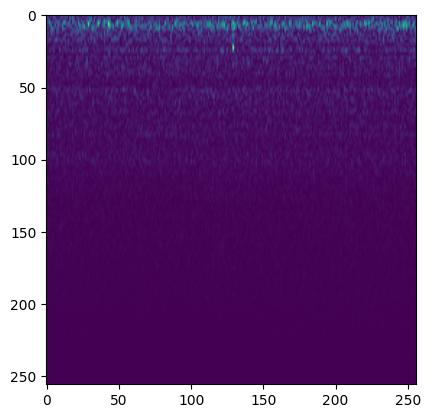

In [123]:
plt.imshow(tf.transpose(data[0]))

In [93]:
audio.device

'/job:localhost/replica:0/task:0/device:CPU:0'

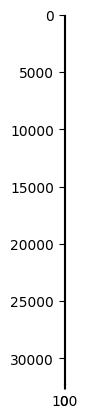

In [77]:
plt.imshow(w)

In [ ]:
import tensorflow_io as tfio
audio = tfio.audio.AudioIOTensor((datasets_path / 'hinges_13' / 'audio.mp4'))


NotImplementedError: unable to open file: libtensorflow_io.so, from paths: ['/Users/yannick.habecker/projects/personal/printer-anomaly-detection/.venv/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ["dlopen(/Users/yannick.habecker/projects/personal/printer-anomaly-detection/.venv/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so, 0x0006): tried: '/Users/yannick.habecker/projects/personal/printer-anomaly-detection/.venv/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/Users/yannick.habecker/projects/personal/printer-anomaly-detection/.venv/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so' (no such file), '/Users/yannick.habecker/projects/personal/printer-anomaly-detection/.venv/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so' (no such file)"]

In [ ]:
def get_audio_duration(path: Path) -> float:
    return librosa.get_duration(filename=path.as_posix())

In [ ]:
audio = load_audio_file(datasets_path / 'hinges_13' / 'audio.mp4')
duration = get_audio_duration(datasets_path / 'hinges_13' / 'audio.mp4')

for w in _windowed_sft(audio, size=256, step_size=16384):
    print(w.shape)
    break
    

/var/folders/6q/g9f59p5n0rd1tggpmzl8mk6m0000gp/T/ipykernel_77725/2987125324.py:32: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, _ = librosa.load(path.as_posix())


(2, 256)


/var/folders/6q/g9f59p5n0rd1tggpmzl8mk6m0000gp/T/ipykernel_77725/1444955159.py:2: FutureWarning: get_duration() keyword argument 'filename' has been renamed to 'path' in version 0.10.0.
	This alias will be removed in version 1.0.
  return librosa.get_duration(filename=path.as_posix())
/var/folders/6q/g9f59p5n0rd1tggpmzl8mk6m0000gp/T/ipykernel_77725/1444955159.py:2: FutureWarning: PySoundFile failed. Trying audioread instead.
	Audioread support is deprecated in librosa 0.10.0 and will be removed in version 1.0.
  return librosa.get_duration(filename=path.as_posix())


In [ ]:
print(windows)
print(audio.shape[0] // 16384)

9169
9168


In [ ]:
def get_audio_dataset_sample_count(after: Datetime, before: Datetime, outcomes: Set[Outcome] = frozenset({Outcome.SUCCESS}), sr=22050) -> Iterator[Path]:
    count = 0
    for print_path in datasets_path.iterdir():
        if print_path.is_file():
            continue
        
        time = get_recording_time(print_path)
        if time < after or time > before:
            continue

        outcome = get_outcome(print_path)
        if outcome not in outcomes:
            continue

        duration = get_audio_duration(print_path / 'audio.mp4')
        count += int(duration * sr)
    return count

samples = get_audio_dataset_sample_count(after = Datetime.min, before = Datetime.max)
for i in [1, 16, 1024, 4096, 16384, 32768, 65536, 131072]:
    print(f'step_size={i} samples={samples // i:,}')

/var/folders/6q/g9f59p5n0rd1tggpmzl8mk6m0000gp/T/ipykernel_77725/1444955159.py:2: FutureWarning: get_duration() keyword argument 'filename' has been renamed to 'path' in version 0.10.0.
	This alias will be removed in version 1.0.
  return librosa.get_duration(filename=path.as_posix())
/var/folders/6q/g9f59p5n0rd1tggpmzl8mk6m0000gp/T/ipykernel_77725/1444955159.py:2: FutureWarning: PySoundFile failed. Trying audioread instead.
	Audioread support is deprecated in librosa 0.10.0 and will be removed in version 1.0.
  return librosa.get_duration(filename=path.as_posix())


step_size=1 samples=2,850,600,943
step_size=16 samples=178,162,558
step_size=1024 samples=2,783,789
step_size=4096 samples=695,947
step_size=16384 samples=173,986
step_size=32768 samples=86,993
step_size=65536 samples=43,496
step_size=131072 samples=21,748


In [ ]:
list(range(0, 100, 10))

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90]

In [ ]:
%timeit -r 1 -n 1

from ipywidgets import IntProgress
from IPython.display import display
from time import sleep

step_size = 131072
progress_bar = IntProgress(min=0, max=samples / step_size, description=f'Testload')
display(progress_bar)
if True:
    for i, window in enumerate(load_audio_dataset(after = Datetime.min, before = Datetime.max, window_size=size, step_size=step_size)):
        assert i < 22000
        if i % 1024 == 0:
            progress_bar.value = i
            sleep(0.01)

IntProgress(value=0, description='Testload', max=21748)

/var/folders/6q/g9f59p5n0rd1tggpmzl8mk6m0000gp/T/ipykernel_77725/113073198.py:32: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, _ = librosa.load(path.as_posix())
/Users/yannick.habecker/projects/personal/printer-anomaly-detection/.venv/lib/python3.10/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


KeyboardInterrupt: 

## Data loading

In [ ]:
from dataclasses import dataclass
import dataclass_csv

from printer_anomaly_detection.dataset.domain import Datetime

@dataclass
class Upgrade:
    what: str
    when: Datetime
    effects: str = 'audio;video'

with open(datasets_path / 'upgrades.csv', 'r', encoding='utf-8') as f:
    upgrades = list(sorted(dataclass_csv.DataclassReader(f, Upgrade), key= lambda u: u.when))


In [ ]:
before = Datetime.min
for upgrade in upgrades + [Upgrade('nothing', Datetime.max)]:
    if 'audio' not in upgrade.effects:
        continue
    after = upgrade.when
    number_of_successes = len(list(get_audio_dataset_files(before, after, {Outcome.SUCCESS})))
    number_of_failures = len(list(get_audio_dataset_files(before, after, {Outcome.FAILURE})))
    print(before, after, f'then_upgraded={upgrade.what} +={number_of_successes} -={number_of_failures}')
    before = after

0001-01-01T00:00:00 2023-04-21T10:00:00 then_upgraded=exhaust +=5 -=0
2023-04-21T10:00:00 2023-05-30T12:00:00 then_upgraded=direct_drive +=13 -=5
2023-05-30T12:00:00 9999-12-31T23:59:59.999999 then_upgraded=nothing +=8 -=3


In [ ]:
upgrades[0].when

2023-04-21T10:00:00

In [ ]:
datasets_path

PosixPath('../../../../datasets/prints')

In [ ]:
images = 0

size = 1025
max_stft = np.zeros((size,)*2)

for window in load_audio_dataset(after = Datetime.min, before = Datetime.max, window_size=size, step_size=1024):
    break
    if window.shape != (size, size):
        continue
    max_stft = np.maximum(max_stft, window)

/var/folders/6q/g9f59p5n0rd1tggpmzl8mk6m0000gp/T/ipykernel_77725/3818036884.py:30: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, _ = librosa.load(path.as_posix())


In [ ]:
plt.imsave('max_stft.png', max_stft)

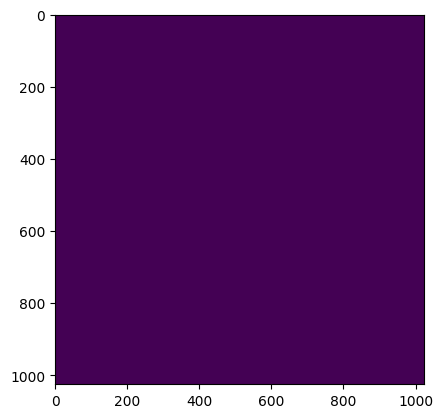

In [ ]:
plt.figure()
plt.imshow(max_stft)
plt.savefig('max_stft.png')